## Hypothesis Testing Assignment

In [2]:
#Importing necessary packages
import pandas as pd
import numpy as np
# package with hypothesis tests
import scipy.stats as st

### Data

You can download the data from [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bUUNlUTVrMF9VcVU/view?usp=sharing&resourcekey=0-16O9Fc5eaJH99-M7AHqHOg). The data contains results of all NBA games from seasons 2013/2014 to 2015/2016.

In [6]:
df = pd.read_csv('nba_games_2013_2015 (2).csv', delimiter=';')

In [7]:
df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22015,1610612750,MIN,Minnesota Timberwolves,21501226,2016-04-13,MIN vs. NOP,W,240,144,...,0.826,5,38,43,41,14,8,13,20,35.0
1,22015,1610612749,MIL,Milwaukee Bucks,21501225,2016-04-13,MIL vs. IND,L,240,92,...,0.846,7,36,43,23,8,3,15,15,-5.0
2,22015,1610612738,BOS,Boston Celtics,21501217,2016-04-13,BOS vs. MIA,W,240,98,...,0.864,10,29,39,20,7,3,7,20,10.0
3,22015,1610612747,LAL,Los Angeles Lakers,21501228,2016-04-13,LAL vs. UTA,W,239,101,...,0.867,8,39,47,19,6,3,13,17,5.0
4,22015,1610612739,CLE,Cleveland Cavaliers,21501220,2016-04-13,CLE vs. DET,L,265,110,...,0.733,8,35,43,21,4,7,10,23,-2.0


--------------
### Task 1
Split the data into **3** separate dataframes for each NBA season!

In [9]:
df.SEASON_ID.unique()

array([22015, 22014, 22013])

In [10]:
df_2013 = df[df.SEASON_ID == 22013] 

In [11]:
df_2014 = df[df.SEASON_ID == 22014]

In [12]:
df_2015 = df[df.SEASON_ID == 22015]

---------------
### Task 2
Test the hypothesis that the offensive productions stats of the Cleveland Cavaliers and Golden State Warriors (the teams that met in the finals that year) were from the same distribution in the 2015/2016 season.

Offensive production refers to two variables: **PTS (Points)** and **FG_PCT (Field Goal Percentage)**. We will need to do two separate hypothesis tests, one for each variable.

In [13]:
df_2015_cle = df_2015[df_2015.TEAM_ABBREVIATION == 'CLE']

In [17]:
df_2015_cle = df_2015_cle[['PTS', 'FG_PCT']]

In [18]:
df_2015_cle

,PTS,FG_PCT
4,110,0.474
40,109,0.482
78,102,0.434
127,109,0.473
151,109,0.547
...,...,...
2336,96,0.398
2364,107,0.519
2399,102,0.453
2440,106,0.488


In [19]:
df_2015_gsw = df_2015[df_2015.TEAM_ABBREVIATION == 'GSW']
df_2015_gsw = df_2015_gsw[['PTS', 'FG_PCT']]
df_2015_gsw

,PTS,FG_PCT
13,125,0.529
73,92,0.442
74,100,0.448
111,112,0.542
141,117,0.500
...,...,...
2324,112,0.459
2356,119,0.512
2393,134,0.548
2405,112,0.462


In [22]:
st.kstest(df_2015_cle.PTS, df_2015_gsw.PTS)

KstestResult(statistic=0.4024390243902439, pvalue=2.5400281722991783e-06, statistic_location=110, statistic_sign=1)

In [23]:
st.kstest(df_2015_cle.FG_PCT, df_2015_gsw.FG_PCT)

KstestResult(statistic=0.25609756097560976, pvalue=0.008991166830753808, statistic_location=0.482, statistic_sign=1)

In [24]:
import seaborn as sns

<Axes: xlabel='PTS', ylabel='Count'>

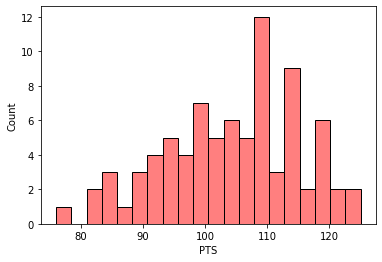

In [30]:
sns.histplot(df_2015_cle.PTS, color='red', alpha=0.5, bins=20)

<Axes: xlabel='PTS', ylabel='Count'>

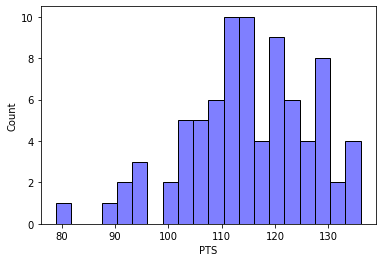

In [31]:
sns.histplot(df_2015_gsw.PTS, color='blue', alpha=0.5, bins=20)

<Axes: xlabel='FG_PCT', ylabel='Count'>

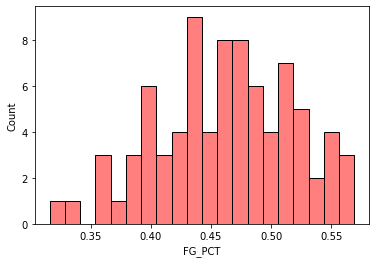

In [32]:
sns.histplot(df_2015_cle.FG_PCT, color='red', alpha=0.5, bins=20)

<Axes: xlabel='FG_PCT', ylabel='Count'>

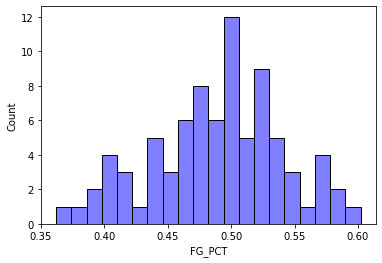

In [33]:
sns.histplot(df_2015_gsw.FG_PCT, color='blue', alpha=0.5, bins=20)

-----------------
### Task 3
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers changed significantly after the head coach changed in the 2015/2016 season.

- **Coach Blatt was fired on 24th of Jan, 2016**. 

Use the data from seasons 2014/2015 and 2015/2016 - those are years when Cleveland was coached by Blatt. 

**We have two possible solutions to try here:**
- Take the same amount of games from before and after and try t-test.
- Take all the games from before and after and look for the right test to compare two samples with different sizes. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

In [41]:
df_short = df_2015[['TEAM_ABBREVIATION', 'GAME_DATE', 'PTS']]

In [42]:
df_cle = df_short[df_short.TEAM_ABBREVIATION == 'CLE']
df_cle

,TEAM_ABBREVIATION,GAME_DATE,PTS
4,CLE,2016-04-13,110
40,CLE,2016-04-11,109
78,CLE,2016-04-09,102
127,CLE,2016-04-06,109
151,CLE,2016-04-05,109
...,...,...,...
2336,CLE,2015-11-04,96
2364,CLE,2015-11-02,107
2399,CLE,2015-10-30,102
2440,CLE,2015-10-28,106


In [43]:
df_cle_fired = df_cle[df_cle.GAME_DATE >= '2016-01-24']

In [46]:
df_cle_fired.sort_values(by='GAME_DATE', ascending=False, inplace=True)

/var/folders/sy/61n20bpj6f9dzqcywtfdt3z00000gn/T/ipykernel_48662/389144826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cle_fired.sort_values(by='GAME_DATE', ascending=False, inplace=True)


In [57]:
len(df_cle_fired)

40

In [49]:
df_cle_not_fired = df_cle[df_cle.GAME_DATE < '2016-01-24']

In [51]:
len(df_cle_not_fired)

42

In [55]:
df_cle_not_fired = df_cle_not_fired[0:40]

In [56]:
len(df_cle_not_fired)

40

In [59]:
st.ttest_ind(df_cle_fired.PTS, df_cle_not_fired.PTS, equal_var=False)

Ttest_indResult(statistic=2.911228614180665, pvalue=0.004774658460978929)

----------------


### Task 4
Download [**the similar dataset**](https://drive.google.com/file/d/0Bz9_0VdXvv9bRHhuRTI1aXBQcTA/view?usp=sharing&resourcekey=0-jGIaWyk0bXyECNSzB3x38w) with scores from playoff games in 2016.

In [61]:
df = pd.read_csv('nba_playoff_games_2016.csv', delimiter=';')

In [62]:
df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42015,1610612739,CLE,Cleveland Cavaliers,41500407,2016-06-19,CLE @ GSW,W,241,93,...,0.840,9,39,48,17,7,6,11,15,4.0
1,42015,1610612744,GSW,Golden State Warriors,41500407,2016-06-19,GSW vs. CLE,L,239,89,...,0.769,7,32,39,22,7,5,10,23,-4.0
2,42015,1610612744,GSW,Golden State Warriors,41500406,2016-06-16,GSW @ CLE,L,238,101,...,0.690,9,26,35,19,5,3,14,25,-14.0
3,42015,1610612739,CLE,Cleveland Cavaliers,41500406,2016-06-16,CLE vs. GSW,W,240,115,...,0.781,8,37,45,24,12,7,10,25,14.0
4,42015,1610612739,CLE,Cleveland Cavaliers,41500405,2016-06-13,CLE @ GSW,W,241,112,...,0.609,8,33,41,15,11,9,16,22,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,42015,1610612760,OKC,Oklahoma City Thunder,41500161,2016-04-16,OKC vs. DAL,W,243,108,...,0.857,14,42,56,23,7,6,18,25,38.0
168,42015,1610612737,ATL,Atlanta Hawks,41500131,2016-04-16,ATL vs. BOS,W,238,102,...,0.771,13,40,53,23,4,9,11,20,1.0
169,42015,1610612745,HOU,Houston Rockets,41500141,2016-04-16,HOU @ GSW,L,240,78,...,0.500,13,38,51,16,10,6,24,28,-26.0
170,42015,1610612742,DAL,Dallas Mavericks,41500161,2016-04-16,DAL @ OKC,L,238,70,...,0.615,9,24,33,16,5,0,12,25,-38.0


------------
### Task 5
Test the hypothesis that **number of blocks (BLK)** are from the same distribution in both the NBA playoffs and in the NBA regular season for 2015/2016 seaon for the **Toronto Raptors**. 

- We will be working with two samples with different sizes again.

In [64]:
df_season_blocks_tor = df_2015[['TEAM_ABBREVIATION','BLK']][df_2015.TEAM_ABBREVIATION == 'TOR']

In [65]:
df_season_blocks_tor

,TEAM_ABBREVIATION,BLK
9,TOR,10
28,TOR,5
71,TOR,6
96,TOR,5
110,TOR,4
...,...,...
2323,TOR,3
2346,TOR,6
2370,TOR,3
2414,TOR,3


In [66]:
df_playoffs_blocks_tor = df[['TEAM_ABBREVIATION','BLK']][df.TEAM_ABBREVIATION == 'TOR']

In [67]:
df_playoffs_blocks_tor

,TEAM_ABBREVIATION,BLK
19,TOR,2
22,TOR,3
26,TOR,3
31,TOR,4
32,TOR,4
36,TOR,1
40,TOR,4
43,TOR,4
46,TOR,7
55,TOR,2


In [71]:
st.kstest(df_season_blocks_tor.BLK, df_playoffs_blocks_tor.BLK)

KstestResult(statistic=0.33414634146341465, pvalue=0.04184880172296358, statistic_location=4, statistic_sign=-1)


-----------------
### Task 6
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers is equally distributed for all 3 seasons. 

- In this case, we need a hypothesis test that compares more than 2 distributions at the same. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

In [72]:
df_cle_2013 = df_2013[['TEAM_ABBREVIATION', 'GAME_DATE', 'PTS']][df_2013.TEAM_ABBREVIATION == 'CLE']    

In [73]:
df_cle_2014 = df_2014[['TEAM_ABBREVIATION', 'GAME_DATE', 'PTS']][df_2014.TEAM_ABBREVIATION == 'CLE']

In [74]:
df_cle_2015 = df_2015[['TEAM_ABBREVIATION', 'GAME_DATE', 'PTS']][df_2015.TEAM_ABBREVIATION == 'CLE']

In [75]:
st.f_oneway(df_cle_2013.PTS, df_cle_2014.PTS, df_cle_2015.PTS)

F_onewayResult(statistic=5.9200250318080885, pvalue=0.003087727119983984)

#### Follow Up
**Between which seasons can we see the significant difference?**

+ Unfortunatelly, this is not the output of an ANOVA test and further tests are needed to be run.
+ Note: Lebron James came back to the Cleveland Caveliers prior to season 2014/2015. We can use this fact to interpret our results correctly.

In [82]:
st.kstest(df_cle_2013.PTS, df_cle_2014.PTS)

KstestResult(statistic=0.1951219512195122, pvalue=0.08806670037526289, statistic_location=97, statistic_sign=1)